In [ ]:
# Q6_perceptron_AND_gate.py
# Implementing a single-layer perceptron using NumPy for the AND gate

import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        # initialize weights and bias
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        # step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # linear combination + activation
        z = np.dot(x, self.weights) + self.bias
        return self.activation(z)

    def fit(self, X, y):
        # training process
        for epoch in range(self.epochs):
            total_error = 0
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                total_error += abs(error)
            print(f"Epoch {epoch+1}: total errors = {total_error}")
            if total_error == 0:
                break


# Input and output data for AND gate
# Truth table: (x1, x2) → y
# (0,0)=0, (0,1)=0, (1,0)=0, (1,1)=1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Create perceptron object and train
p = Perceptron(input_size=2, learning_rate=0.2, epochs=10)
p.fit(X, y)

# Display final weights and bias
print("Final Weights:", p.weights)
print("Final Bias:", p.bias)

# Test predictions
print("\nPredictions for AND gate:")
for i in range(len(X)):
    print(f"{X[i]} -> {p.predict(X[i])}")


Epoch 1: total errors = 2
Epoch 2: total errors = 3
Epoch 3: total errors = 3
Epoch 4: total errors = 0
Final Weights: [0.4 0.2]
Final Bias: -0.4000000000000001

Predictions for AND gate:
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


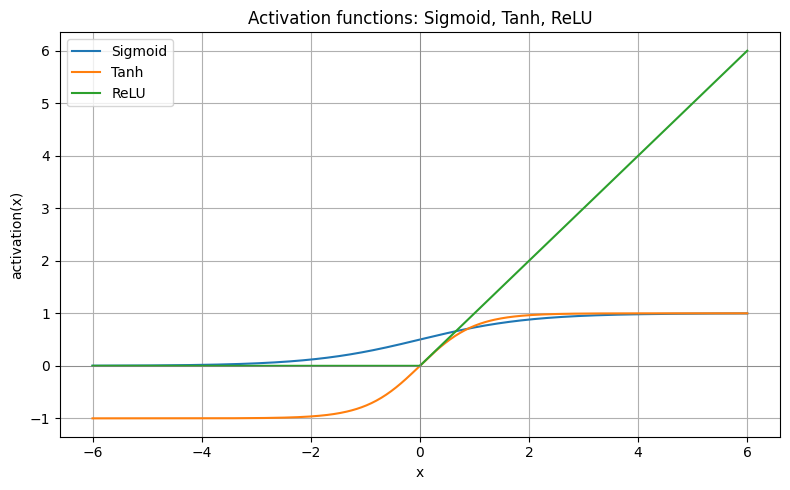

In [ ]:
# Q7=Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-6, 6, 400)
y_sig = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)

plt.figure(figsize=(8,5))
plt.plot(x, y_sig, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_relu, label='ReLU')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.title('Activation functions: Sigmoid, Tanh, ReLU')
plt.xlabel('x')
plt.ylabel('activation(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Q8:Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST (this will download if not already cached)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess: flatten + normalize
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Build model
model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train (adjust epochs based on compute; 5-10 recommended)
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Print final training accuracy
final_train_acc = history.history['accuracy'][-1]
print(f"Final training accuracy (last epoch): {final_train_acc:.4f}")

# Evaluate on test set (optional)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8547 - loss: 0.5165 - val_accuracy: 0.9640 - val_loss: 0.1283
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9654 - loss: 0.1165 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9773 - loss: 0.0774 - val_accuracy: 0.9768 - val_loss: 0.0769
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9847 - loss: 0.0515 - val_accuracy: 0.9773 - val_loss: 0.0851
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9891 - loss: 0.0377 - val_accuracy: 0.9802 - val_loss: 0.0694
Final training accuracy (last epoch): 0.9878
Test accuracy: 0.9794


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6787 - loss: 0.9023 - val_accuracy: 0.8515 - val_loss: 0.4097
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8373 - loss: 0.4487 - val_accuracy: 0.8605 - val_loss: 0.3789
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8507 - loss: 0.4041 - val_accuracy: 0.8715 - val_loss: 0.3486
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8660 - loss: 0.3672 - val_accuracy: 0.8717 - val_loss: 0.3486
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8743 - loss: 0.3485 - val_accuracy: 0.8793 - val_loss: 0.3399
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8713 - loss: 0.3443 - val_accuracy: 0.8723 - val_loss: 0.3369
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━

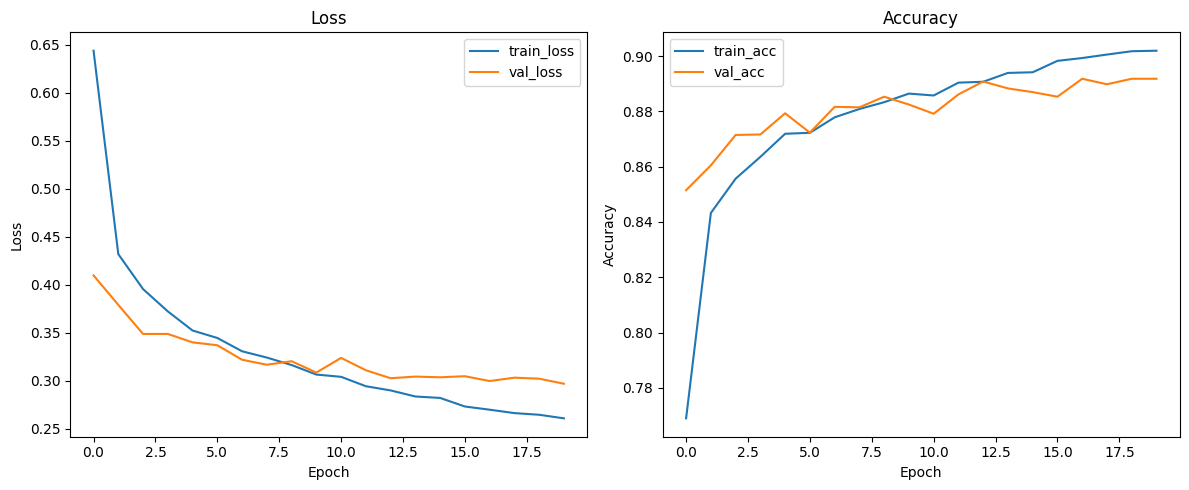

In [ ]:
# Q9:Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# Model
model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split=0.1, verbose=1)

# Plot curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
# Q10_sample_dataframe.py
# Simulated dataset for fraud detection

import numpy as np
import pandas as pd

np.random.seed(42)  # for reproducibility

# number of samples
n = 5000

# numeric features
amount = np.random.exponential(scale=2000, size=n)
time_from_last_txn = np.random.randint(0, 10000, size=n)
avg_amount_7d = amount * np.random.uniform(0.8, 1.2, size=n)
distance_from_home = np.random.uniform(0, 100, size=n)

# categorical features (encoded as integers)
merchant_id = np.random.randint(1, 100, size=n)
merchant_category = np.random.randint(1, 10, size=n)
device_id = np.random.randint(1, 500, size=n)
# fraud label (imbalanced: 2% fraud)
fraud_prob = np.random.rand(n)
label = np.where(fraud_prob < 0.02, 1, 0)

# combine into DataFrame
df = pd.DataFrame({
    'amount': amount,
    'time_from_last_txn': time_from_last_txn,
    'avg_amount_7d': avg_amount_7d,
    'distance_from_home': distance_from_home,
    'merchant_id': merchant_id,
    'merchant_category': merchant_category,
    'device_id': device_id,
    'label': label
})

print(df.head())
print("\\nFraud cases:", df['label'].sum(), "/", n)


        amount  time_from_last_txn  avg_amount_7d  distance_from_home  \
0   938.536180                3122     933.984882           42.013455   
1  6020.242862                8167    6507.074204           96.890172   
2  2633.491387                5190    2647.417264           69.460761   
3  1825.885108                4575    2097.654276           71.917192   
4   339.249741                7727     310.608516           56.270201   

   merchant_id  merchant_category  device_id  label  
0           25                  9        272      0  
1           16                  1        159      0  
2           85                  9        210      0  
3           13                  5         14      0  
4           52                  1         25      0  
\nFraud cases: 94 / 5000
